In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [5]:
df.isna().sum()

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

We decided to drop hostpital column because there is 96% of missing values in that column.
We decided to drop the UNESCO datasets because there are overlapping predictors with the predictors in GHO datasets. Another reason we choose GHO datasets over UNESCO datasets is because some of them variables in UNESCO has more than 70% null data, eg une_poverty, une_edu_spend, une_literacy, une_school. However, we retained une_pop and une_hiv because these two variables are not found in GHO datasets.


In [6]:
df.drop(['une_infant', 'une_life', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school'], 
        axis = 1, inplace = True)

We decided to drop 'hostpital' column because there is 96% of missing values in that column. 
We also dropped 'country code' column because 'country' column itself is enough for reference.

In [7]:
df.drop(['hospitals'], axis = 1, inplace = True)
df.drop(['country_code'], axis = 1, inplace =True)

In [8]:
mortality = pd.DataFrame(df[['adult_mortality', 'infant_mort', 'age1-4mort']])
mortality.head()

,adult_mortality,infant_mort,age1-4mort
0,383.5583,0.137985,0.025695
1,372.3876,0.133675,0.024500
2,354.5147,0.128320,0.023260
3,343.2169,0.122040,0.021925
4,333.8711,0.115700,0.020545


The values of adult mortality are rate per 1000 populations thus we convert it into the same format as the other two mortality rate in order to ease the EDA.

In [9]:
for i in range(0, 3111):
    val = df.iloc[i]['adult_mortality']
    adjusted_val = val/1000 
    df.at[i, 'adult_mortality'] = adjusted_val

In [10]:
df.rename(columns = {'adult_mortality':'adult_mort_rate', 'infant_mort':'infant_mort_rate', 'age1-4mort':'age1-4_mort_rate'}, 
          inplace = True)

In [11]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               50
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Checking missing values under 'alcohol' column

In [12]:
df[df['alcohol'].isna()]['country'].value_counts()

South Sudan    17
Sudan          11
Montenegro      6
Serbia          6
Afghanistan     5
Canada          5
Name: country, dtype: int64

In [13]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

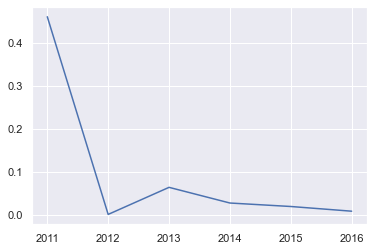

In [14]:
plt.plot('year', 'alcohol', data = sudan_df)

In [15]:
sudan_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

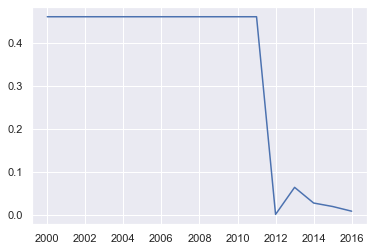

In [16]:
plt.plot('year', 'alcohol', data = sudan_df)

In [17]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

In [18]:
sudan_df.bfill(inplace = True)

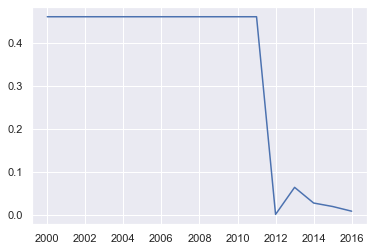

In [19]:
plt.plot('year', 'alcohol', data = sudan_df)

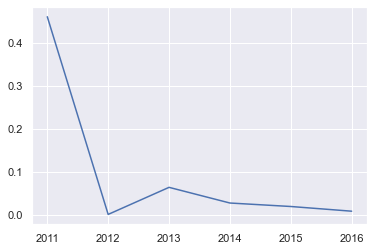

In [20]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

In [21]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

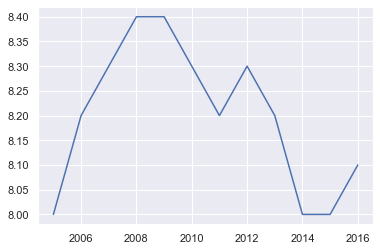

In [22]:
plt.plot('year', 'alcohol', data = canada_df)

In [23]:
canada_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

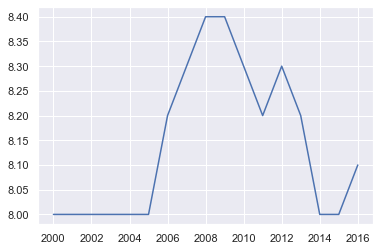

In [24]:
plt.plot('year', 'alcohol', data = canada_df)

In [25]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

In [26]:
canada_df.ffill(inplace = True)

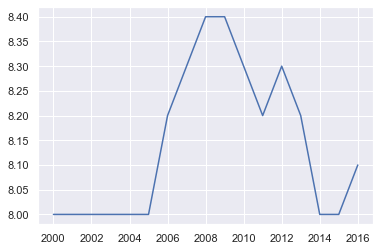

In [27]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

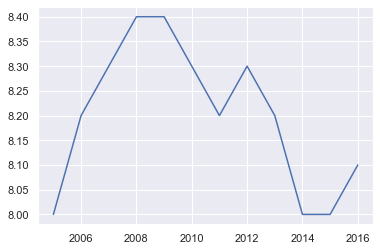

In [28]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

In [29]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])

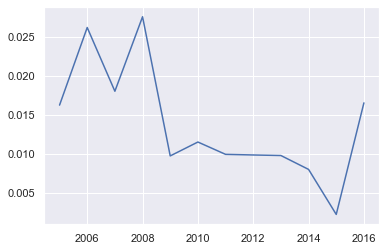

In [30]:
plt.plot('year', 'alcohol', data = afg_df)

In [31]:
afg_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

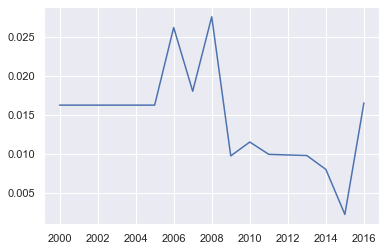

In [32]:
plt.plot('year', 'alcohol', data = afg_df)

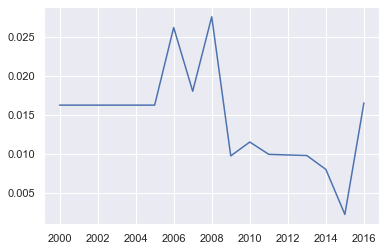

In [33]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

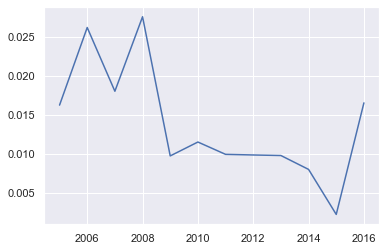

In [34]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

Analysis : It is obvious that no trend can be observed from the above plot as the years given to observe the trend of the data are too few and also the missing values are usually appear to be missing in consecutive years. In addition to this, we realisedt that forward filling is not working in this case and this indicates that backward filling might also not working for other cases. Thus, interpolation with linear method and both directin will be the better method to fill in the missing values as it is able to fill in missing values which appears to be in the recent years or in the earliest year. Furthermore, if the missing values are more than 10 for a country, we tend not to fill in the null values as too few of available datas to be used as reference for filling in the missing values and might contribute to low accuracy. 

In [35]:
countries = df[df['alcohol'].isna()]['country'].unique().tolist()

In [36]:
for country in countries:
    if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc('alcohol')
        alcohol_df = pd.DataFrame(df.iloc[row_index, col_index])
        alcohol_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = alcohol_df

<ipython-input-36-ba402bbb7128>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:


In [37]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               28
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Define a method to fill the null values with the condition that if missing values for one country are more than 10 then the null values will be retained

In [38]:
def fill_na(pred, country):
    if len(df[df[pred].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc(pred)
        pred_df = pd.DataFrame(df.iloc[row_index, col_index])
        pred_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = pred_df

In [39]:
df[df['bmi'].isna()]['country'].value_counts()

Sudan          17
South Sudan    17
Name: country, dtype: int64

In [40]:
df[df['age5-19thinness'].isna()]['country'].value_counts()

Sudan          17
South Sudan    17
Name: country, dtype: int64

In [41]:
df[df['age5-19obesity'].isna()]['country'].value_counts()

Sudan          17
South Sudan    17
Name: country, dtype: int64

To check if the fill_na method works well on other datasets as well.

In [42]:
df[df['hepatitis'].isna()]['country'].value_counts()

Slovenia       17
Denmark        17
Iceland        17
Switzerland    17
Norway         17
               ..
Australia       1
Barbados        1
Bahamas         1
Mozambique      1
Panama          1
Name: country, Length: 99, dtype: int64

In [43]:
aus_df = pd.DataFrame(df[df['country'] == 'Australia'])

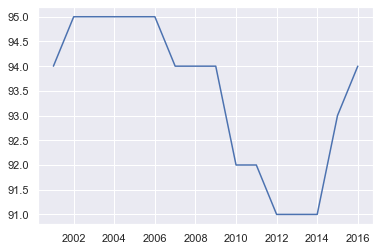

In [44]:
plt.plot('year', 'hepatitis', data = aus_df)

In [45]:
aus_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

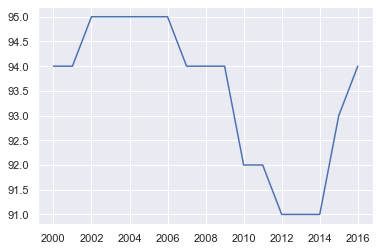

In [46]:
plt.plot('year', 'hepatitis', data = aus_df)

In [47]:
pnm_df = pd.DataFrame(df[df['country'] == 'Panama'])

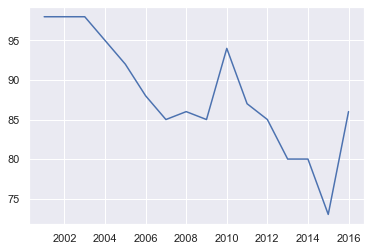

In [48]:
plt.plot('year', 'hepatitis', data = pnm_df)

In [49]:
pnm_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

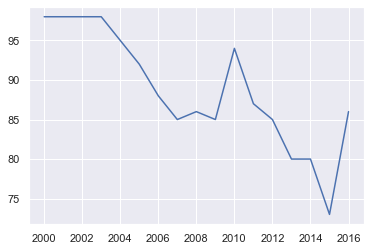

In [50]:
plt.plot('year', 'hepatitis', data = pnm_df)

Conclusion : The fill_na method can be used thus we will just generate a list of variables with null value and fill in the null values if condition is met

In [51]:
countries = df[df['hepatitis'].isna()]['country'].unique().tolist()

In [52]:
for country in countries:
    fill_na('hepatitis', country)

<ipython-input-38-771e9a623dd2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [53]:
null_pred = df.columns[df.isna().any()].tolist()
null_pred.remove('alcohol')
null_pred.remove('bmi')
null_pred.remove('age5-19thinness')
null_pred.remove('age5-19obesity')
null_pred.remove('hepatitis')

In [54]:
null_pred

['measles',
 'polio',
 'diphtheria',
 'basic_water',
 'doctors',
 'gni_capita',
 'gghe-d',
 'che_gdp',
 'une_pop',
 'une_hiv']

In [55]:
for pred in null_pred:
    countries = df[df[pred].isna()]['country'].unique().tolist()
    for country in countries:
        fill_na(pred, country)

<ipython-input-38-771e9a623dd2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [56]:
df.isna().sum()

country               0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mort_rate       0
infant_mort_rate      0
age1-4_mort_rate      0
alcohol              28
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           230
measles              11
polio                11
diphtheria           11
basic_water          11
doctors             895
gni_capita          107
gghe-d               68
che_gdp              85
une_pop              31
une_hiv             731
dtype: int64